## 단순 선형 회귀(Linear Regression)

### 아버지와 아들의 키 - Galton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


### 아버지와 아들의 키

In [4]:
# 1885년 당시, 아버지와 아들의 키 (엄마키안봄, 딸키안봄)
df = df[df.Gender =='M']
height = df[['Father', 'Height']].rename(columns={'Height': 'Son'})
height.Father = height.Father * 2.54 #인치를 센치로 바꾸는
height.Son = height.Son * 2.54
height.describe()

,Father,Son
count,465.000000,465.000000
mean,175.687157,175.841196
std,5.841820,6.684249
min,157.480000,152.400000
25%,172.720000,171.450000
50%,175.260000,175.768000
75%,179.070000,180.340000
max,199.390000,200.660000


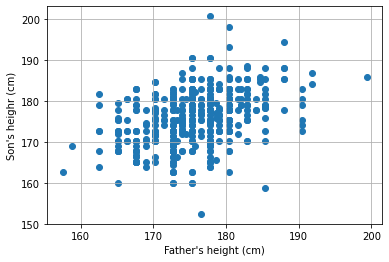

In [5]:
plt.scatter(height.Father, height.Son);
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's heighr (cm)")
plt.grid()
plt.show()

### Numpy 최소자승법을 이용해서 회귀선 구하기
(잔차제곱의 합을 최소화로..)

In [6]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [7]:
reg = np.linalg.lstsq(A, height.Son, rcond=None) 
reg
#0.4477기울기 97.1776절편
#17556.5995 rss

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [8]:
# 기울기와 절편
m, c = reg[0]

# 잔차 제곱의 합(오차제곱의 합) Residual Sum of Square
rss = reg[1][0]

In [9]:
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


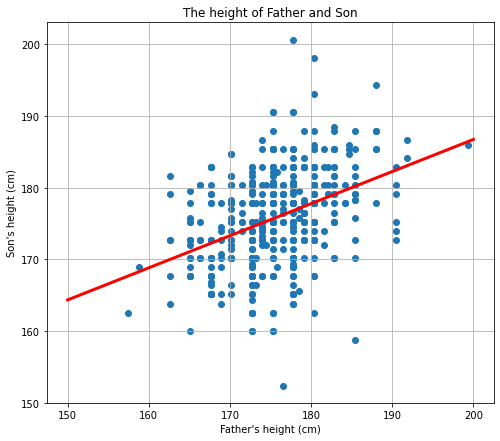

In [10]:
plt.figure(figsize=(8,7))
plt.scatter(height.Father, height.Son) #(x, y)
plt.plot([150, 200], [m*150+c, m*200+c], 'r', lw=3) #[x,x] [y,y]
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)"); plt.ylabel("Son's height (cm)")
plt.grid(); plt.show()

### Scikit-Learn을 이용해서 구하기

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
X = height.Father.values.reshape(-1, 1) #values붙이면 넘파이의 어레이가된다. 무조건 2차원이되어야 사이킷런에 들어갈수있기 때문에 (-1앞에는 모르겠고, 뒤에 1은 꼭)
y = height.Son.values

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [14]:
dir(lr) #결과치 뭐가들어있나..

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [15]:
weight, bias = lr.coef_, lr.intercept_ #학습후에 나오는 coef_ 계수coefficient(weight, bias가 구해짐)  intercept
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


In [16]:
lr.coef_ 
#변수가 여러개나올지도 모르니까 어레이로 들어가있다
#그래서 weight[0] 해줘야함 
#위에 넘파이로 하던 사이킷런으로 하던 같은결과! 뭐라도 하나 제대로하면 됨ㅋ

array([0.44774792])

In [17]:
#평가기준 r2_score 또는 R_squared (0~1사이. 1에가까울수록 좋은거! 잘표현했다!)
score = lr.score(X, y)
print(f'R_squared score: {score: .4f}')
#0.1531결과는 별로란예기;;;;;;;;;
#퍼져있는 데이터라서 회귀선을 그리기 좋지 않음;ㅁ;?ㅋㅋ
#데이터를 바꿔야함?ㅋㅋ

R_squared score:  0.1531


## 당뇨병 데이터셋
### 당뇨병 데이터셋을 이용해서 단순선형회귀를 해보자

In [18]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [19]:
diabetes.target[:5] #y값 /(X값은 컬럼?) ..이것은 다중회귀

array([151.,  75., 141., 206., 135.])

### 당뇨병 vs BMI

In [20]:
# BMI컬럼만 뽑아서 단일회귀를 만들어보자
X = diabetes.data[:, 2].reshape(-1,1) #.reshape(-1,1)잊지말자!!
y = diabetes.target

In [21]:
X.shape
#데이터 442건, 변수1개쓸예정

(442, 1)

In [22]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [23]:
weight, bias = lr.coef_, lr.intercept_ #학습후에 나오는 coef_ 계수coefficient(weight, bias가 구해짐)
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 949.4353, 절편: 152.1335, 잔차제곱: 1719581.81


#### 위와같은방식말고 다른방식으로는.. 
### 훈련/테스트 데이터 셋 분리후 학습/평가/예측

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=2021
)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = lr.predict(X_test)

In [27]:
#선형회귀에 정확도가 없으니까 r2_score로 평가, 잔차제곱보다 mse
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred) #숫자도크고 단위도 제곱이 되어있는것.
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')

Mean Squared Error: 3470.1713, RMSE: 58.9082


In [28]:
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')
# 결과값 0.0939는 못했다는..........ㅋㅋㅋㅋ

R_squared: 0.0939


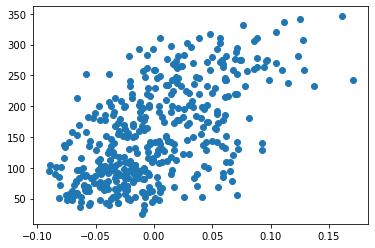

In [29]:
# 그래프로확인
plt.scatter(X_train, y_train) 
plt.show() #범위확인

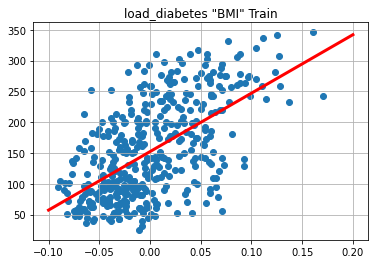

In [30]:
plt.scatter(X_train, y_train) 
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3) #[x,x] [y,y]
plt.title('load_diabetes "BMI" Train')
plt.grid();
plt.show()

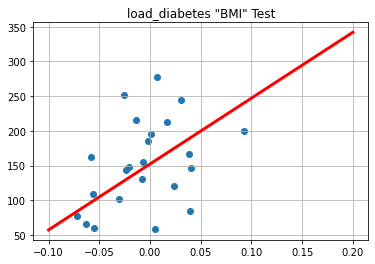

In [31]:
plt.scatter(X_test, y_test) 
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3) #[x,x] [y,y]
plt.title('load_diabetes "BMI" Test')
plt.grid();
plt.show()

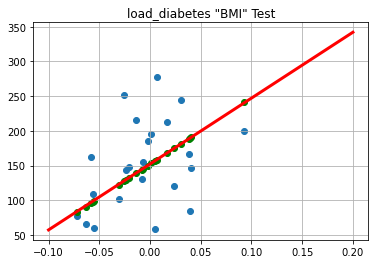

In [32]:
plt.scatter(X_test, y_test) 
plt.scatter(X_test, pred, c='g') 
plt.plot([-0.1, 0.2],[-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3) #[x,x] [y,y]
plt.title('load_diabetes "BMI" Test')
plt.grid();
plt.show()

### 당뇨병 vs BP

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:,3], y, test_size=0.05, random_state=2021  #[:,3] x축은 다하고, 3번째컬럼
)

In [34]:
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, pred) #숫자도크고 단위도 제곱이 되어있는것.
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}, RMSE: {rmse:.4f}')
score = r2_score(y_test, pred)
print(f'R_squared: {score:.4f}')

Mean Squared Error: 1999.8592, RMSE: 44.7198
R_squared: 0.4778


In [36]:
weight, bias = lr.coef_, lr.intercept_ #학습후에 나오는 coef_ 계수coefficient(weight, bias가 구해짐)
rss = lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 702.8299, 절편: 151.8194, 잔차제곱: 2064342.24


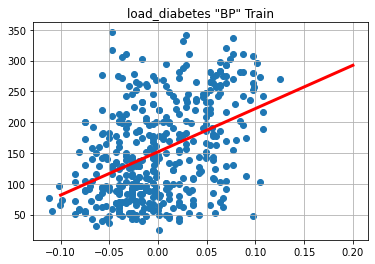

In [38]:
plt.scatter(X_train, y_train) 
plt.plot([-0.1, 0.2], [-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3) #[x,x] [y,y]
plt.title('load_diabetes "BP" Train')
plt.grid();
plt.show()

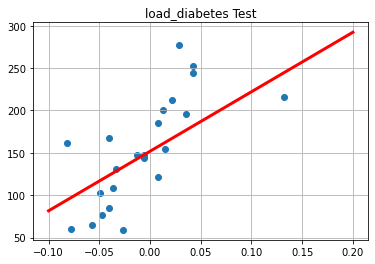

In [42]:
plt.scatter(X_test, y_test) 
plt.plot([-0.1, 0.2],[-0.1*weight+bias, 0.2*weight+bias], 'r', lw=3) #[x,x] [y,y]
plt.title('load_diabetes "BP" Test')
plt.grid();
plt.show()

### 회귀표본 만들기 (ppt.14p)

In [40]:
from sklearn.datasets import make_regression

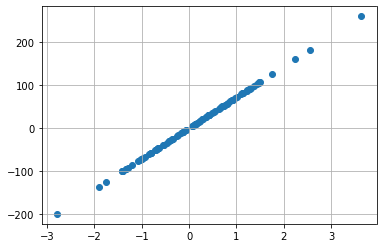

In [54]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, random_state=2021)
plt.scatter(X, y) 
plt.grid();
plt.show()

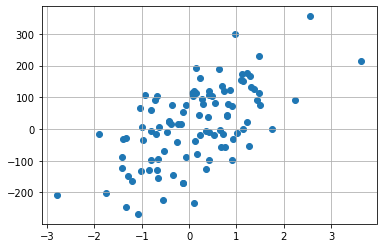

In [55]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=100, random_state=2021)
plt.scatter(X, y) 
plt.grid();
plt.show()

In [56]:
lr = LinearRegression()
lr.fit(X, y)
weight, bias = lr.coef_, lr.intercept_

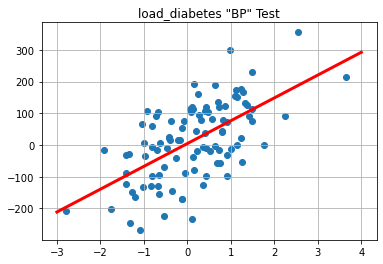

In [57]:
plt.scatter(X, y) 
plt.plot([-3, 4],[-3*weight+bias, 4*weight+bias], 'r', lw=3) #[x,x] [y,y]
plt.title('load_diabetes "BP" Test')
plt.grid();
plt.show()

In [58]:
lr.score(X, y)

0.3644244725778779